# Predicting  Car Prices
## This notebook intends to predict car prices in the dataset provided.

Statistical methods such as K-Nearest Neighbors and Hyperparameter Optimization will be used to generate a prediction model for the car prices.

The dataset will also be separated into two sections, a training set and a test set, to determine the effectiveness of the model.

This notebook will do increments in improving the model to generate findings and appreciation on how the modification of the model will improve the outcomes.

### Dataset Source: UCI Machine Learning Repository
#### Link: https://archive.ics.uci.edu/ml/datasets/automobile

## Importing the libraries and setting up the dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# All columns must be displayed when the dataframe is viewed.
pd.options.display.max_columns = 30

# The column names will be added manually since it's not originally included in the main file.
cars_col_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Creating the dataframe.
cars = pd.read_csv('imports-85.data', names=cars_col_names)

In [2]:
# See how a sample of the dataframe looks like.
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Check the rows and columns available.
cars.shape

(205, 26)

## Note on the price prediction process.

The features of the dataset will help the model learn how the price is generated. With this, the features involved will be numerical columns that will help predict the price.

__Target__: __'price'__ column

__Features__: 'symboling', 'normalized_losses', 'num_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', num_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg' columns

In [4]:
# Replace '?' values with np.nan
cars = cars.replace('?', np.nan)
# Convert 'normalized_losses' column to float
cars['normalized_losses'] = cars['normalized_losses'].astype('float')
cars[cars.isna().any(axis=1)]['normalized_losses'].value_counts(dropna=False)

NaN      41
150.0     4
148.0     1
Name: normalized_losses, dtype: int64

### Removal of 'normalized_losses'

Drop 'normalized_losses' column since NaN values take up 20% of the rows of the entire dataframe.

In [5]:
cars = cars.drop(columns='normalized_losses')
cars[cars.isna().any(axis=1)]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


### Addressing the remaining NaN values

The remaining rows with NaN values may be addressed by doing a Google search for the missing values. The characteristics of the car provided in the rows might help identify the vehicles.

Rows that have NaN values after the Google search will be averaged with their respective columns.

Sources:

index=9 : 1986 Audi Quattro
https://www.audiworld.com/model/ur-quattro/86-urq.shtml
Notes: Original SRP not found.

index=27 : Dodge Colt Hatchback
https://www.dodge-wiki.com/wiki/Dodge_Colt
Notes: Number of doors (NaN value) addressed.

index=44, 45 : Isuzu Gemini
https://en.wikipedia.org/wiki/Isuzu_Gemini
Notes: Original SRP not found

index=55 to 58: Mazda RX-7
http://www.worleys.com/rx-7/1st-generation-differences.html
Notes: Bore and Stroke (NaN values) missing, probably due to engine design (rotary).

index=63: Mazda 626 Diesel
https://www.mcall.com/news/mc-xpm-1986-04-05-2531396-story.html
Notes: Number of doors addressed.

index=129: 1990 Porsche 928 GT
https://www.supercars.net/blog/1990-porsche-928-gt/
Notes: Price addressed.

index=130: Renault Sportswagon
https://www.mcall.com/news/mc-xpm-1985-10-19-2502965-story.html
Notes: Horsepower and Peak RPM addressed

index=131: Renault Fuego Turbo
https://www.automobile-catalog.com/car/1986/2932715/renault_fuego_2_2_litre.html
Notes: Horsepower and Peak RPM addressed

In [6]:
# Filling up the missing details of selected rows.
cars.iloc[27,4] = 'two'
cars.iloc[63,4] = 'four'
cars.iloc[129,-1] = 50000
cars.iloc[130,-5] = 91
cars.iloc[130,-4] = 4000
cars.iloc[131,-5] = 91
cars.iloc[131,-4] = 5000

In [7]:
# Checking the remaining rows
cars[cars.isna().any(axis=1)]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


### Computation of average for remaining missing values
The remaining rows above will be averaged due to lack of data, but the columns that have missing values will be cleaned and converted to their proper dtypes first.

Removing these rows might affect the final outcome of this study since the dataset is not as abundant in data as hoped.

In [8]:
# Convert string values to numerics for the number of doors.
cars['num_doors'].unique()

array(['two', 'four'], dtype=object)

In [9]:
cars['num_doors'] = cars['num_doors'].str.replace('four', '4').str.replace('two', '2')

In [10]:
# Convert string values to numerics for the number of cylinders.
cars['num_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
cyl_dict = {'four':'4', 'six':'6', 'five':'5', 'eight':'8', 'twelve':'12', 'three':'3'}
cars['num_cylinders'] = cars['num_cylinders'].map(cyl_dict)

In [12]:
# Convert all numerical columns to floats.
cars[['symboling', 'num_doors', 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']] = cars[['symboling', 'num_doors', 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']].astype('float')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_doors          205 non-null    float64
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    float64
 13  engine_type        205 non-null    object 
 14  num_cylinders      201 non-null    float64
 15  engine_size        205 non-null    float64
 16  fuel_system        205 non

In [13]:
# Fill the remaining NaN values with the mean of each column.
cars = cars.fillna(cars.mean(numeric_only=True))
# Check if there are other NaN values.
cars.isna().any()

symboling            False
make                 False
fuel_type            False
aspiration           False
num_doors            False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_cylinders        False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [14]:
#Normalize the numerical columns from 0 to 1 for the study.
cars_numerics = cars.select_dtypes(include=np.number).columns.tolist()
#Drop the 'price' column from the list of columns to normalize. The original price should be left intact.
del cars_numerics[-1]
cars[cars_numerics] = (cars[cars_numerics] - cars[cars_numerics].min()) / (cars[cars_numerics].max() - cars[cars_numerics].min())

In [15]:
# Creating the first KNeighborsRegressor function with standard K and one feature only.
def knn_train_test(training, target, df):
    # Generate random seed to ensure that the study can be replicated.
    np.random.seed(1)
    
    # Copy the original dataset and create a new order for the rows.
    df_rand = df.iloc[np.random.permutation(df.shape[0]),:].copy()
    df_rand.reset_index(inplace=True)
    
    # Divide the dataset with whole numbers.
    row_cutoff = df_rand.shape[0] // 2
    
    # Separate train and test datasets.
    test = df_rand.iloc[:row_cutoff, :]
    train = df_rand.iloc[row_cutoff:, :]

    # Create instance of KNeighborsRegressor.
    knn = KNeighborsRegressor()
    knn.fit(train[[training]], train[target])
    
    # Generate predicted prices and RMSE.
    test_values = knn.predict(test[[training]])
    rmse = (mean_squared_error(test_values, test[target]))**0.5
    return rmse

In [16]:
# For loop for the first KNeighborsRegressor function.
first_test_results = {}
for i in cars_numerics:
    output = knn_train_test(i, 'price', cars)
    first_test_results[i] = output
first_test_results

{'symboling': 8256.599854560942,
 'num_doors': 10245.117939288812,
 'wheel_base': 5540.832164191658,
 'length': 6265.78308971397,
 'width': 4338.110050693628,
 'height': 7681.793859913249,
 'curb_weight': 4390.526164548101,
 'num_cylinders': 5033.326281040468,
 'engine_size': 3120.3938816475397,
 'bore': 6587.004400705166,
 'stroke': 7939.755419764881,
 'compression_ratio': 5514.109680777103,
 'horsepower': 4568.94169851929,
 'peak_rpm': 7934.727663382145,
 'city_mpg': 4445.704612987675,
 'highway_mpg': 4589.462859108483}

### Initial findings for features with least bias
'engine_size' column performed the best with the least amount of bias among the columns. Although the overall performance is still lacking since the value can alter the price significantly. Let's try adjusting the K values.

In [17]:
# Modifying the KNeighborsRegressor function that can take different K values.
def knn_train_test(k, training, target, df):
    np.random.seed(1)
    df_rand = df.iloc[np.random.permutation(df.shape[0]),:].copy()
    df_rand.reset_index(inplace=True)
    row_cutoff = df_rand.shape[0] // 2
    test = df_rand.iloc[:row_cutoff, :]
    train = df_rand.iloc[row_cutoff:, :]

    # K values can be adjusted through n_neighbors.
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[[training]], train[target])
    test_values = knn.predict(test[[training]])
    rmse = (mean_squared_error(test_values, test[target]))**0.5
    return rmse

In [18]:
# Create a dictionary to present the data.
k_dict = {}
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for s in cars_numerics:
    second_test_results_dict = {}
    for i in k_values:
        output = knn_train_test(i, s, 'price', cars)
        second_test_results_dict[i] = output
    k_dict[s] = second_test_results_dict

k_dict

{'symboling': {1: 7815.7528761322965,
  2: 9535.027654954594,
  3: 8819.433772070179,
  4: 8594.368919485303,
  5: 8256.599854560942,
  6: 8057.250690734187,
  7: 7434.720934875639,
  8: 8295.55342970487,
  9: 8072.026000194199},
 'num_doors': {1: 8105.991355417523,
  2: 10089.207879981413,
  3: 8732.148261463133,
  4: 8191.79201442372,
  5: 10245.117939288812,
  6: 9216.555367532223,
  7: 9053.786956048152,
  8: 8853.048687340322,
  9: 8361.363071547423},
 'wheel_base': {1: 8817.238229952365,
  2: 5301.400738952299,
  3: 5732.998007465456,
  4: 5745.454182678814,
  5: 5540.832164191658,
  6: 5586.048895427621,
  7: 5546.5762676985705,
  8: 5662.500582201541,
  9: 5701.217860441363},
 'length': {1: 5181.933088779942,
  2: 4825.107977763099,
  3: 5747.78014258248,
  4: 6066.98702108458,
  5: 6265.78308971397,
  6: 5943.7028545124385,
  7: 5838.923761934008,
  8: 5780.596004671455,
  9: 5645.0749182924865},
 'width': {1: 4160.451578963788,
  2: 4501.758250709343,
  3: 4641.9474693181555,

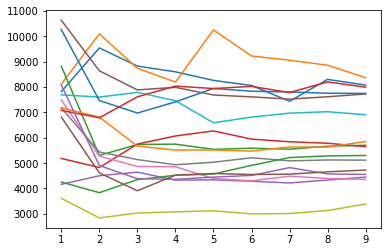

In [19]:
# Plot the data from the previous output.
for key, value in k_dict.items():
    x = k_values
    y = list(value.values())
    plt.plot(x, y)
plt.show()

### Model development through a mix of different K values and features.
It appears that 'engine_size' with a k value of 2 provides the best approximate of the price.

With all these, we can still do better to make a better model that provides a good estimate of the cars' prices.

In [20]:
# Average the values from the dictionary and line plot above to choose the top features. 
k_dict_mean = {}
for key, value in k_dict.items():
    val_list = []
    for k, v in value.items():
        val_list.append(v)
    output = sum(val_list) / len(val_list)
    k_dict_mean[key] = output

k_dict_list = sorted(k_dict_mean.items(), key=lambda x: x[1])
k_dict_list

[('engine_size', 3134.3146339184004),
 ('width', 4360.70541517801),
 ('horsepower', 4691.973488932233),
 ('highway_mpg', 4771.208176894081),
 ('curb_weight', 4933.368235049842),
 ('city_mpg', 4958.27583523477),
 ('num_cylinders', 5360.629077474024),
 ('length', 5699.543206592718),
 ('compression_ratio', 5918.204098967406),
 ('wheel_base', 5959.3629921121865),
 ('bore', 7201.998435091829),
 ('peak_rpm', 7713.6948264405255),
 ('stroke', 7907.939929565101),
 ('height', 8141.01349147416),
 ('symboling', 8320.081570301356),
 ('num_doors', 8983.223503671416)]

### Features for Multivariate K-Nearest Neighbors
The top 5 features are 'engine_size', 'width', 'horsepower', 'highway_mpg' and 'curb_weight'.

In [21]:
# Modify the function to take in a list of features. K will be left as 5.
def knn_train_test(training_list, target, df):
    np.random.seed(1)
    df_rand = df.iloc[np.random.permutation(df.shape[0]),:].copy()
    df_rand.reset_index(inplace=True)
    row_cutoff = df_rand.shape[0] // 2
    test = df_rand.iloc[:row_cutoff, :]
    train = df_rand.iloc[row_cutoff:, :]
    knn = KNeighborsRegressor(n_neighbors=5)
    
    # List of features will be housed inside the training_list.
    knn.fit(train.loc[:,training_list], train[target])
    test_values = knn.predict(test.loc[:,training_list])
    rmse = (mean_squared_error(test_values, test[target]))**0.5
    return rmse

In [22]:
# Using the modified function to see the performance of the model with multiple features.
top_2_features = knn_train_test(['engine_size','width'], 'price', cars)
top_3_features = knn_train_test(['engine_size','width','city_mpg'], 'price', cars)
top_4_features = knn_train_test(['engine_size','width','city_mpg', 'horsepower'], 'price', cars)
top_5_features = knn_train_test(['engine_size','width','city_mpg', 'horsepower', 'highway_mpg'], 'price', cars)

print(top_2_features, top_3_features, top_4_features, top_5_features)

3614.403412332596 3736.306171905465 3802.5407254283846 3787.028259808432


### Number of features to use for multiple K values
The top 3 models appear to have the top 2,3, and 5 features. We'll proceed with the tuning of the k-value with these three.

In [23]:
# Modify the function to take in multiple features and different K values.
def knn_train_test(training_list, target, df):
    # rmses list will house all of the RMSE outputs from the different K values.
    rmses = []
    # For loop is needed to generate numerous K values for the function.
    for i in range(1,26):
        np.random.seed(1)
        df_rand = df.iloc[np.random.permutation(df.shape[0]),:].copy()
        df_rand.reset_index(inplace=True)
        row_cutoff = df_rand.shape[0] // 2
        test = df_rand.iloc[:row_cutoff, :]
        train = df_rand.iloc[row_cutoff:, :]
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train.loc[:,training_list], train[target])
        test_values = knn.predict(test.loc[:,training_list])
        rmse = (mean_squared_error(test_values, test[target]))**0.5
        rmses.append(rmse)
    return rmses

In [24]:
# Application of the revised function with multiple features and K values.
top_2_features = knn_train_test(['engine_size','width'], 'price', cars)
top_3_features = knn_train_test(['engine_size','width','city_mpg'], 'price', cars)
top_5_features = knn_train_test(['engine_size','width','city_mpg', 'horsepower', 'highway_mpg'], 'price', cars)

In [25]:
# Create a function to present the number of features, K values, and output.
def dict_maker(key, list_):
    dict_agg = dict()
    list_length = len(list_) + 1
    for i, val in zip(range(1,list_length), list_):
        dict_agg[i] = val
    dict_output = {key: dict_agg}
    return dict_output

top_2 = dict_maker('Top 2 Features', top_2_features)
top_3 = dict_maker('Top 3 Features', top_3_features)
top_5 = dict_maker('Top 5 Features', top_5_features)
print(top_2)
print(top_3)
print(top_5)

{'Top 2 Features': {1: 2782.5595484288974, 2: 3315.2217371002835, 3: 3570.530821432068, 4: 3733.35316163954, 5: 3614.403412332596, 6: 3654.3215676952127, 7: 3830.3932259227013, 8: 3947.909981151255, 9: 3990.8919173712475, 10: 3912.293813658033, 11: 3969.20363208398, 12: 4007.101706763765, 13: 4080.7708729530996, 14: 4140.383059014129, 15: 4228.94488767718, 16: 4324.2628136479925, 17: 4337.763162713485, 18: 4403.241380457064, 19: 4433.665675711318, 20: 4501.10458691168, 21: 4574.543527281762, 22: 4606.971227461701, 23: 4624.286492081508, 24: 4684.311219410056, 25: 4766.439270757113}}
{'Top 3 Features': {1: 2913.7127708717385, 2: 3385.612406332015, 3: 3724.253688308949, 4: 3698.6123534443072, 5: 3736.306171905465, 6: 3869.2992188963653, 7: 3799.0726736007477, 8: 3831.0611902999694, 9: 3787.064715899527, 10: 3693.3941233517335, 11: 3829.1258379735573, 12: 3945.3268012032504, 13: 3957.979305595213, 14: 4023.8695579483024, 15: 4048.7013791098316, 16: 4051.863039751499, 17: 4082.553331570467

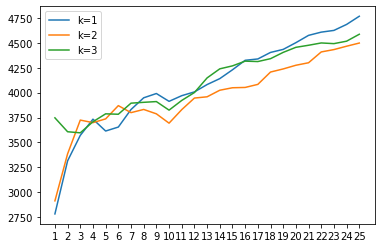

In [26]:
# Create a function to plot the three dictionaries.
def dict_plot(dict_items_list):
    x_master_list = list()
    y_master_list = list()
    for dict_items in dict_items_list:
        x = list()
        y = list()
        for key, value in dict_items.items():
            for k, v in value.items():
                x.append(k)
                y.append(v)
        x_master_list.append(x)
        y_master_list.append(y)
    for i in range(len(x_master_list)):
        plt.plot(x_master_list[i], y_master_list[i], label='k='+str(i+1))
        plt.xticks(ticks=x, labels=x)
    plt.legend()
    return plt.show()

dict_plot([top_2, top_3, top_5])

# Findings
### It appears that the most effective combination of features and k value are the following:
\- Use of the top 2 features: __'engine_size'__and __'width'__.

\- k value of __1__.

\- Lowest output is __2782.5595484288974__.